<a href="https://colab.research.google.com/github/rishicarter/Tensorflow_fundamentals/blob/main/04_Tensorflow_transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zipf = zipfile.ZipFile('10_food_classes_10_percent.zip')
zipf.extractall()
zipf.close()

--2022-04-22 19:04:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  54.8MB/s    in 2.9s    

2022-04-22 19:04:48 (54.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os
for root,dirnames,filenames in os.walk('10_food_classes_10_percent'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {root}')

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/test
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 10 directori

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
EPOCHS=5
 
train_dir='10_food_classes_10_percent/train/'
test_dir='10_food_classes_10_percent/test/'

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=IMAGE_SHAPE,
                                                 batch_size=BATCH_SIZE,class_mode='categorical',
                                                 seed=42)
test_data=test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SHAPE,
                                             seed=42,class_mode='categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import datetime

def create_tensorboard_callback(dirname,experiment_name):
  log_dir=dirname+'/'+experiment_name+'/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'SAving log files to: {log_dir}')
  return tensorboard_callback

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
effecientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url,num_classes=10):
  feature_extractor_layer=hub.KerasLayer(model_url,
                                         trainable=False,
                                         name='feature_extraction_layer',
                                         input_shape=IMAGE_SHAPE+(3,))
  
  model=tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes,activation='softmax',name='output_layer')
  ])
  return model

In [ ]:
resenet_model=create_model(resnet_url,num_classes=train_data.num_classes)

In [ ]:
resenet_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])
resenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resenet_hist=resenet_model.fit(train_data,epochs=5,
                  steps_per_epoch=len(train_data),
                  callbacks=[create_tensorboard_callback(dirname='tfhub',
                                                         experiment_name='resenet50v2')],
                  validation_data=test_data,
                  validation_steps=len(test_data))

SAving log files to: tfhub/resenet50v2/20220422-191101
Epoch 1/5
24/24 [==============================] - 17s 710ms/step - loss: 0.2654 - accuracy: 0.9573 - val_loss: 0.6240 - val_accuracy: 0.7928
Epoch 2/5
24/24 [==============================] - 16s 691ms/step - loss: 0.2230 - accuracy: 0.9707 - val_loss: 0.6163 - val_accuracy: 0.7896
Epoch 3/5
24/24 [==============================] - 16s 696ms/step - loss: 0.1923 - accuracy: 0.9827 - val_loss: 0.6062 - val_accuracy: 0.7964
Epoch 4/5
24/24 [==============================] - 16s 692ms/step - loss: 0.1638 - accuracy: 0.9880 - val_loss: 0.6002 - val_accuracy: 0.8016
Epoch 5/5
24/24 [==============================] - 16s 698ms/step - loss: 0.1428 - accuracy: 0.9907 - val_loss: 0.6035 - val_accuracy: 0.7964


In [ ]:
import matplotlib.pyplot as plt
def loss_curve(hist):
  loss,valloss=hist.history['loss'],hist.history['val_loss']
  accuracy,val_accuracy=hist.history['accuracy'],hist.history['val_accuracy']
  epochs=range(len(hist.history['loss']))

  plt.plot(epochs,loss,label='training loss')
  plt.plot(epochs,valloss,label='val loss')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training accuracy')
  plt.plot(epochs,val_accuracy,label='val accuarcy')
  plt.legend()

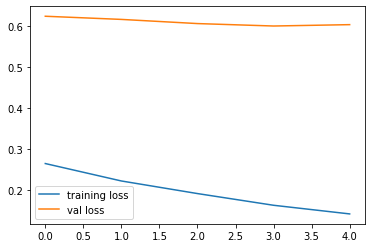

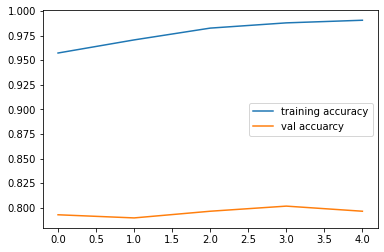

In [ ]:
loss_curve(resenet_hist)

In [ ]:
effnet_model=create_model(effecientnet_url,num_classes=train_data.num_classes)

In [ ]:
effnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
effnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
effnet_hist=effnet_model.fit(train_data,epochs=5,
                             steps_per_epoch=len(train_data),
                             callbacks=create_tensorboard_callback(dirname='tfhub',
                                                                   experiment_name='efficientNet'),
                             validation_data=test_data,
                             validation_steps=len(test_data))

SAving log files to: tfhub/efficientNet/20220422-192040
Epoch 1/5
24/24 [==============================] - 26s 713ms/step - loss: 1.8476 - accuracy: 0.4413 - val_loss: 1.2909 - val_accuracy: 0.7500
Epoch 2/5
24/24 [==============================] - 15s 659ms/step - loss: 1.0460 - accuracy: 0.7733 - val_loss: 0.8602 - val_accuracy: 0.8244
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.7447 - accuracy: 0.8453 - val_loss: 0.6938 - val_accuracy: 0.8496
Epoch 4/5
24/24 [==============================] - 15s 642ms/step - loss: 0.5973 - accuracy: 0.8787 - val_loss: 0.6082 - val_accuracy: 0.8564
Epoch 5/5
24/24 [==============================] - 15s 642ms/step - loss: 0.5046 - accuracy: 0.8973 - val_loss: 0.5554 - val_accuracy: 0.8620


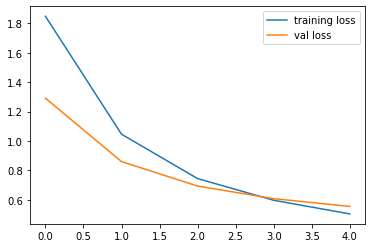

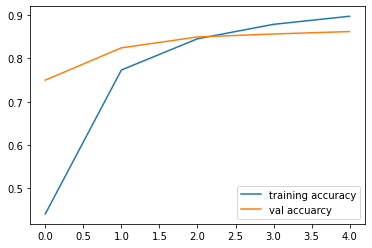

In [ ]:
loss_curve(effnet_hist)

In [ ]:
!tensorboard dev upload --logdir ./tfhub/ \
--name "Effnet vs Resnet" \
--description "Comparing 2 different TF models" \
--one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/HwjSqUWdR6W27VMcXGW74Q/

[2022-04-22T19:36:54] Started scanning logdir.
[2022-04-22T19:37:01] Total uploaded: 90 scalars, 0 tensors, 3 binary objects (7.2 MB)
[2022-04-22T19:37:01] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/HwjSqUWdR6W27VMcXGW74Q/
